In [109]:
# Dependencies and Setup
import warnings
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

warnings.simplefilter(action='ignore', category=FutureWarning)

# File to Load 
california_crimes_df = Path("Resources/california_department_of_justice_1998_to_2023.csv")


# Read Data File and store into Pandas DataFrames
california_crimes = pd.read_csv(california_crimes_df )
california_crimes.head()


,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Firearm,Knife or Cutting Instrument,Other Weapon,...,Other.1,Over $400,Over $200,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"133,596","186,841",0,"117,021","154,796","265,075","14,314","4,687","4,346","5,281"
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"120,898","169,249",0,"106,668","140,138","245,588","14,454","4,655","4,133","5,666"
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"128,376","175,013",0,"102,424","138,102","236,025","14,406","4,669","4,616","5,121"
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"130,778","195,037",0,"106,602","144,146","243,706","15,060","4,612","5,357","5,091"
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"128,573","208,367",0,"110,107","143,798","250,147","14,007","4,119","5,473","4,415"


In [110]:
california_crimes.columns

Index(['Year', 'Violent Crimes', 'Homicide',
       'Rape (Forcible Rape prior to 2014)', 'Rape', 'Attempted Rape',
       'Robbery', 'Firearm', 'Knife or Cutting Instrument', 'Other Weapon',
       'Strong-Arm', 'Highway', 'Commercial', 'Gas Station',
       'Convenience Store', 'Residence', 'Bank', 'Miscellaneous',
       'Aggravated Assault', 'Firearm.1', 'Knife or Cutting Instrument.1',
       'Other Weapon.1', 'Hands  Fists  Feet', 'Property Crimes', 'Burglary',
       'Forcible Entry', 'No Force', 'Residence.1', 'Night', 'Day', 'Unknown',
       'Non-Residence', 'Night.1', 'Day.1', 'Unknown.1', 'Motor Vehicle Theft',
       'Automotive', 'Trucks and Buses', 'Other', 'Larceny-Theft',
       'Pocket-Picking', 'Purse-Snatching', 'Shoplifting',
       'From Motor Vehicle', 'Motor Vehicle Accessories', 'Bicycles',
       'From Building', 'Coin Operated Machine', 'Other.1', 'Over $400',
       'Over $200', '$200 through $400', '$50 through $199', 'Under $50',
       'Arson', 'Structura

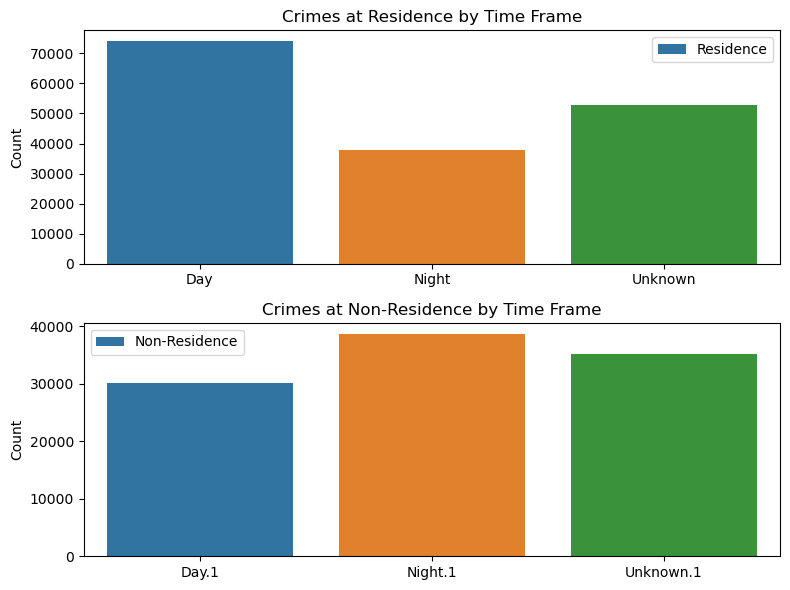

In [111]:

# Remove commas and convert columns to numeric - combined approach Once commas are removed,converts string to integer
columns_to_convert = ['Residence.1', 'Non-Residence', 'Day', 'Night', 'Unknown','Day.1','Night.1','Unknown.1']
california_crimes[columns_to_convert] = california_crimes[columns_to_convert].replace(',', '', regex=True).astype(int)

# Selecting relevant columns for plotting
crime_data = california_crimes[['Residence.1', 'Non-Residence', 'Day', 'Night', 'Unknown','Day.1', 'Night.1', 'Unknown.1']]

# Plotting
plt.figure(figsize=(8, 6))

#(sns.barplot is a powerful tool for visualizing relationships between categorical and numerical variables,
#providing clear insights into data distributions across different categories.

# Plot for Residence
plt.subplot(2, 1, 1)
sns.barplot(x=['Day', 'Night', 'Unknown'], y=crime_data.loc[0, ['Day', 'Night', 'Unknown']], label='Residence')
plt.title('Crimes at Residence by Time Frame')
plt.ylabel('Count')
plt.legend()

# Plot for Non-Residence
plt.subplot(2, 1, 2)
sns.barplot(x=['Day.1', 'Night.1', 'Unknown.1'], y=crime_data.loc[0, ['Day.1', 'Night.1', 'Unknown.1']], label='Non-Residence')
plt.title('Crimes at Non-Residence by Time Frame')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()
